# Lesson 26 - Decision Tree Classifiers

### The following topics are discussed in this notebook:
* Overview of decision tree classifiers.
* Building decision tree models in Scikit-Learn.

## Introduction to Decision Trees

**Decision tree** algorithms apply a divide-and-conquer strategy to split the feature space into small rectangular regions. A single label value is then assigned to each of the regions for the purposes of making predictions. 

A decision tree model generates a prediction for an observation by applying a sequence of logical if-else tests. Each test checks to see if one particular feature is above or below a particular threshold value. The results of each test determine the next test to be applied, and ultimately, the label value to be predicted for the observations. We will explain this process in more detail as we consider examples. 

Decision trees can be used for either classification or regression tasks. In this lesson, we will focus on using decision trees for classification.

## Decision Tree Classifiers in Scikit-Learn

Decision tree classification models are created in Scikit-Learn as instances of the `DecisionTreeClassifier` class, which is found in the `sklearn.tree` module. We will import that now, along with some other Scikit-Learn tools that we will need in this lesson.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Example 1: Synthetic Dataset with Three Classes

We will provide some details about how decision tree classifiers work by considering a simple synthetic example with 3 classes and 2 features. The dataset is stored in a text file, which we will now read into a DataFrame. 

In [2]:
df = pd.read_csv('data/tree_ex_01.txt', sep='\t')
df.head()

,X1,X2,Y
0,-0.5654,-1.4630,2
1,-0.5544,-1.3872,0
2,-1.7460,0.4468,1
3,-1.7076,0.9655,2
4,-1.2895,-1.3389,1


We will extract the feature and label arrays from the DataFrame. 

In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

We will now generate a scatter plot of the dataset, coloring the points according to their class. 

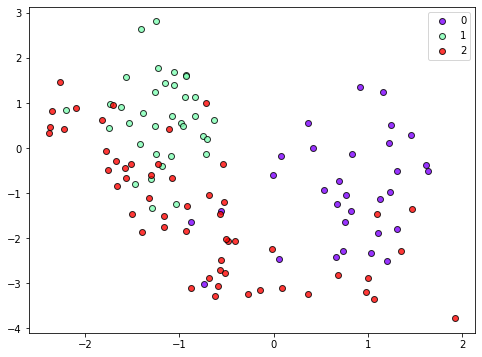

In [4]:
cm = get_cmap('rainbow')
plt.figure(figsize=[8,6])
plt.scatter(X[y==0,0], X[y==0,1], c=[cm(0)], edgecolor='k', alpha=0.8, label=0)
plt.scatter(X[y==1,0], X[y==1,1], c=[cm(0.5)], edgecolor='k', alpha=0.8, label=1)
plt.scatter(X[y==2,0], X[y==2,1], c=[cm(0.99)], edgecolor='k', alpha=0.8, label=2)
plt.legend()
plt.show()

In the cell below, we will create our first decision tree classifier. Notice that when we create our instance of `DecisionTreeClassifier`, we provide the constructor with arguments for the parameters `max_depth` and `random_state`. The `max_depth` parameter controls the maximum number of if-else tests that will be applied when generating a prediction. Generally speaking, larger values of this parameter will result in larger and more complex trees. We will discuss how to select an appropriate value for `max_depth` later in the lesson. The `random_state` parameter specifies a seed what will be set for the random number generator prior to building the tree when the `fit()` method is called. Scikit-learn's implementation of `DecisionTreeClassifier` involves some random elements, and setting `random_state` will enable us to reconstruct a tree later. 

After creating and training our model, we will print out the training accuracy obtained by the model. 

In [5]:
tree_1 = DecisionTreeClassifier(max_depth=3, random_state=1)
tree_1.fit(X, y)

print('Training Accuracy:', tree_1.score(X, y))

Training Accuracy: 0.875


## Visualizing Decision Trees

The figure below display the decision boundaries determined by the decision tree model. 

C:\Users\Nick\AppData\Local\Temp/ipykernel_9536/1118515263.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xticks, yticks, class_grid, cmap='rainbow', zorder=1, vmin=0, vmax=2)


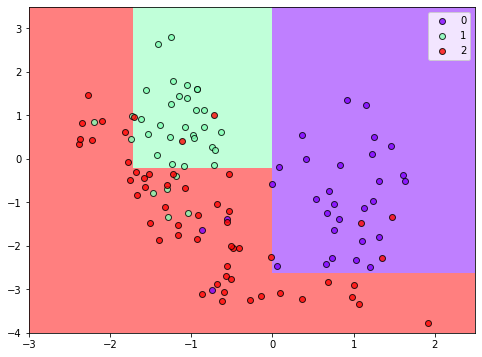

In [6]:
n, x0, x1, y0, y1 = 100, -3, 2.5, -4, 3.5
xticks = np.linspace(x0, x1, n)
yticks = np.linspace(y0, y1, n)
grid_pts = np.transpose([np.tile(xticks,n),
                         np.repeat(yticks,n)])
class_grid = tree_1.predict(grid_pts).reshape(n,n)
plt.figure(figsize=[8,6])
plt.pcolormesh(xticks, yticks, class_grid, cmap='rainbow', zorder=1, vmin=0, vmax=2)
plt.fill([x0,x0,x1,x1], [y0,y1,y1,y0], 'white', alpha=0.5, zorder = 2)
plt.scatter(X[y==0,0], X[y==0,1], c=[cm(0)], edgecolor='k', alpha=0.8, label=0, zorder=3)
plt.scatter(X[y==1,0], X[y==1,1], c=[cm(0.5)], edgecolor='k', alpha=0.8, label=1, zorder=3)
plt.scatter(X[y==2,0], X[y==2,1], c=[cm(0.99)], edgecolor='k', alpha=0.8, label=2, zorder=3)
plt.legend()
plt.show()

The diagram below describes the rules that our decision tree applies when generating predictions. When classifying a new observation, you would start at the top of this flow chart, and work your way down. The first rule applied checks to see if the feature stored in `X[:,0]` is less than or equal to -0.016. If it is, you would move left in the flow chart. Of not, you would move right. When getting to a terminal node at the bottom of the tree, known as a **leaf node**, the model will predict the class for which the largest number of training observations ended up in that same node.  

![tree01](images/tree_1.png)

To help you understand how a decision tree makes predictions, we have translated the diagram above into a series of if-else statements. Assume that the feature values for the observation being classified are stored in a one dimensional array, `X`. Recall that the valid classes for our label variable `Y` are 0, 1, and 2. 

    if X[0] <= -0.016:
        if X[1] <= -0.235:
            if X[1] <= -1.425:
                prediction = 2
            else:
                prediction = 2
        else:
            if X[0] <= -1.76:
                prediction = 2
            else:
                prediction = 1
    else:
        if X[1] <= -2.658:
            prediction = 2
        else:
            prediction = 0

## Effects of Maximum Depth

As mentioned above, selecting a larger value for `max_depth` will typically result in a larger, more complicated tree. In the figure below, we display the decision regions for two decision trees trained on our dataset. The first tree used `max_depth=3`, while the second tree used `max_depth=9`. The training accuracies for each tree are displayed in the titles of the plots. 

C:\Users\Nick\AppData\Local\Temp/ipykernel_9536/1970833701.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xticks, yticks, class_grid_a, cmap='rainbow', zorder=1, vmin=0, vmax=2)
C:\Users\Nick\AppData\Local\Temp/ipykernel_9536/1970833701.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xticks, yticks, class_grid_b, cmap='rainbow', zorder=1, vmin=0, vmax=2)


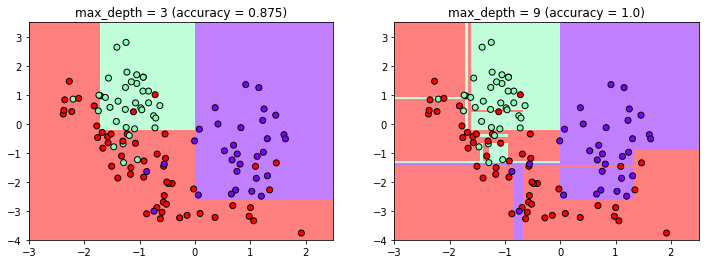

In [7]:
tree_1a = DecisionTreeClassifier(max_depth=3, random_state=1)
tree_1a.fit(X, y)
tree_1b = DecisionTreeClassifier(max_depth=9, random_state=1)
tree_1b.fit(X, y)

n, x0, x1, y0, y1 = 100, -3, 2.5, -4, 3.5
xticks = np.linspace(x0, x1, n)
yticks = np.linspace(y0, y1, n)
grid_pts = np.transpose([np.tile(xticks,n),
                         np.repeat(yticks,n)])
class_grid_a = tree_1a.predict(grid_pts).reshape(n,n)
class_grid_b = tree_1b.predict(grid_pts).reshape(n,n)

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.pcolormesh(xticks, yticks, class_grid_a, cmap='rainbow', zorder=1, vmin=0, vmax=2)
plt.fill([x0,x0,x1,x1], [y0,y1,y1,y0], 'white', alpha=0.5, zorder = 2)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='rainbow', zorder=3)
plt.title('max_depth = 3 (accuracy = ' + str(tree_1a.score(X,y)) + ')')

plt.subplot(1,2,2)
plt.pcolormesh(xticks, yticks, class_grid_b, cmap='rainbow', zorder=1, vmin=0, vmax=2)
plt.fill([x0,x0,x1,x1], [y0,y1,y1,y0], 'white', alpha=0.5, zorder = 2)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='rainbow', zorder=3)
plt.title('max_depth = 9 (accuracy = ' + str(tree_1b.score(X,y)) + ')')
plt.show()

Notice that the larger tree on the right got a perfect 100% accuracy on the training set. That is significally higher than the 87.5% accuracy obtained by the smaller tree on the left. However, we can see by looking at the decision regions in the plot on the right that that larger tree is forming overly complex rules to serve as special cases to accomodate points that should likely be considered as outliers. This model is almost certainly overfitting. Although it does very well on the traing data, it will likely not generalize as well to new data as the simpler model on the left. 

Setting `max_depth` higher will increase the complexity of our model, allowing it to detect more complex patterns, but this comes at an increased risk of overfitting. In the next example, we will present one method for selecting an appropriate value for this parameter. 

## Example 2: Synthetic Dataset with Four Classes

To illustrate the process of selecting a value for `max_depth`, we will work with the synthetic dataset generated below. 

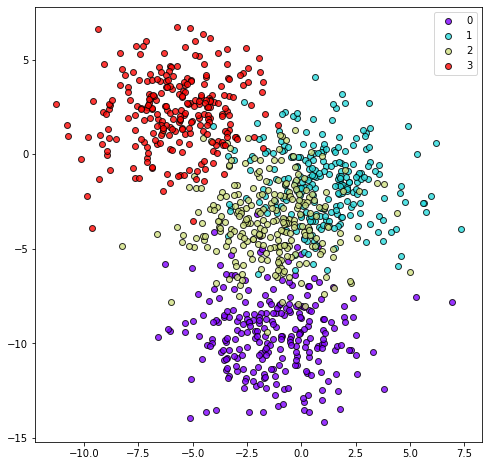

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, random_state=2, n_features=2, cluster_std=2)

plt.figure(figsize=[8,8])
plt.scatter(X[y==0,0], X[y==0,1], c=[cm(0)], edgecolor='k', alpha=0.8, label=0)
plt.scatter(X[y==1,0], X[y==1,1], c=[cm(0.33)], edgecolor='k', alpha=0.8, label=1)
plt.scatter(X[y==2,0], X[y==2,1], c=[cm(0.66)], edgecolor='k', alpha=0.8, label=2)
plt.scatter(X[y==3,0], X[y==3,1], c=[cm(0.99)], edgecolor='k', alpha=0.8, label=3)
plt.legend()
plt.show()


We will now split our dataset into training, validation, and test sets. The need for the creation of a validation set comes from the fact that we need to select a value for the `max_depth` parameter. As we will soon see, the process of selecting a value for a hyperparameter will involve compare many different models. When we compare models, we do so based on their performance on the validation set. 

In [9]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(600,)
(200,)
(200,)


## Hyperparameter Tuning 

A typical approach for selecting an appropriate value for a hyperparameter in a supervised learning problem is to train several models, each with a different value for the hyperparameter. These models are then compared based on their performance on a validation set. Under this approach, we would select the hyperparameter value that resulted in the model with the best validation performance. The process of selecting a hyperparameter value is referred to as **hyperparameter tuning**. 

In the cell below, we will create a decision tree model for each value of `max_depth` from 1 to 20. We will calculate the training and validation accuracies for each model, storing the results in lists. When we are done, we will display a plot showing how the training and validation accuracy are effected by our choice of `max_depth`. 

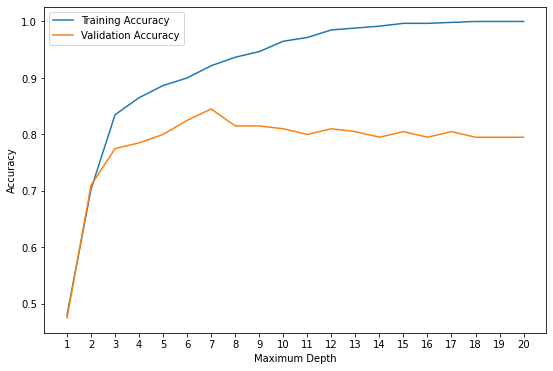

In [10]:
tr_acc = []
va_acc = []

depth_list = range(1,21)

for d in depth_list:
    temp_mod = DecisionTreeClassifier(max_depth=d, random_state=1)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_valid, y_valid))

plt.figure(figsize=([9, 6]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_list)
plt.legend()
plt.show()

We want to use the hyperparameter value that resulted in the highest validation accuracy. We can likely see from the plot above that this yields `max_depth=7`. We will confirm this result programatically in the cell below. 

In [11]:
ix_best = np.argmax(va_acc)
best_md = depth_list[ix_best]
print('Optimal Value of max_depth:', best_md)

Optimal Value of max_depth: 7


We will now build our final tree model using `max_depth=7`. We will then calculate the mode's accuracy on the training, validation, and test sets. 

In [12]:
tree_2 = DecisionTreeClassifier(max_depth=best_md, random_state=1)
tree_2.fit(X_train, y_train)
print('Training Accuracy:  ', round(tree_2.score(X_train, y_train),4))
print('Validation Accuracy:', round(tree_2.score(X_valid, y_valid),4))
print('Test Set Accuracy:  ', round(tree_2.score(X_test, y_test),4))

Training Accuracy:   0.9217
Validation Accuracy: 0.845
Test Set Accuracy:   0.805


The figure below displays the classification regions determined by our decision tree. 

C:\Users\Nick\AppData\Local\Temp/ipykernel_9536/2732916206.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xticks, yticks, class_grid, cmap='rainbow', zorder=1, vmin=0, vmax=3)


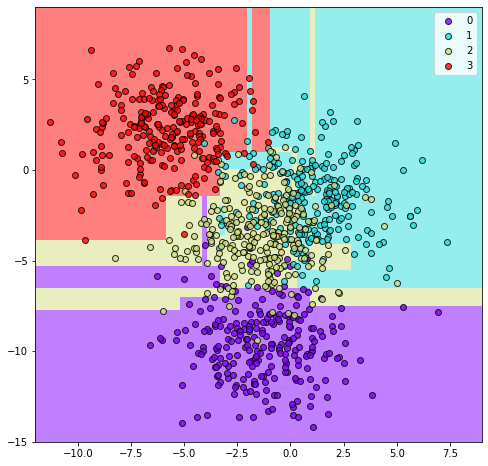

In [13]:
n, x0, x1, y0, y1 = 100, -12, 9, -15, 9
xticks = np.linspace(x0, x1, n)
yticks = np.linspace(y0, y1, n)
grid_pts = np.transpose([np.tile(xticks,n), np.repeat(yticks,n)])
class_grid = tree_2.predict(grid_pts).reshape(n,n)

plt.figure(figsize=[8,8])
plt.pcolormesh(xticks, yticks, class_grid, cmap='rainbow', zorder=1, vmin=0, vmax=3)
plt.fill([x0,x0,x1,x1], [y0,y1,y1,y0], 'white', alpha=0.5, zorder = 2)

plt.scatter(X[y==0,0], X[y==0,1], c=[cm(0)], edgecolor='k', alpha=0.8, label=0, zorder=3)
plt.scatter(X[y==1,0], X[y==1,1], c=[cm(0.33)], edgecolor='k', alpha=0.8, label=1, zorder=3)
plt.scatter(X[y==2,0], X[y==2,1], c=[cm(0.66)], edgecolor='k', alpha=0.8, label=2, zorder=3)
plt.scatter(X[y==3,0], X[y==3,1], c=[cm(0.99)], edgecolor='k', alpha=0.8, label=3, zorder=3)
plt.legend()
plt.show()

## Example 3: Iris Dataset

We will now apply a decision tree classifier to the iris dataset. As before, we will work with a modified version of the original iris dataset that contains 600 observations, 450 of which have been synthetically generated. 

In [14]:
iris = pd.read_table('data/iris_mod.txt', sep='\t')
iris.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.8,3.7,6.1,2.5,virginica
1,6.8,3.0,5.5,2.1,virginica
2,5.9,3.2,5.4,2.2,virginica
3,6.5,3.4,6.0,2.0,virginica
4,6.2,3.0,4.3,1.3,versicolor
5,6.5,3.2,4.9,1.6,versicolor
6,4.7,3.5,1.0,0.2,setosa
7,5.2,3.8,1.5,0.3,setosa
8,5.0,3.4,1.3,0.2,setosa
9,6.6,3.0,5.1,2.0,virginica


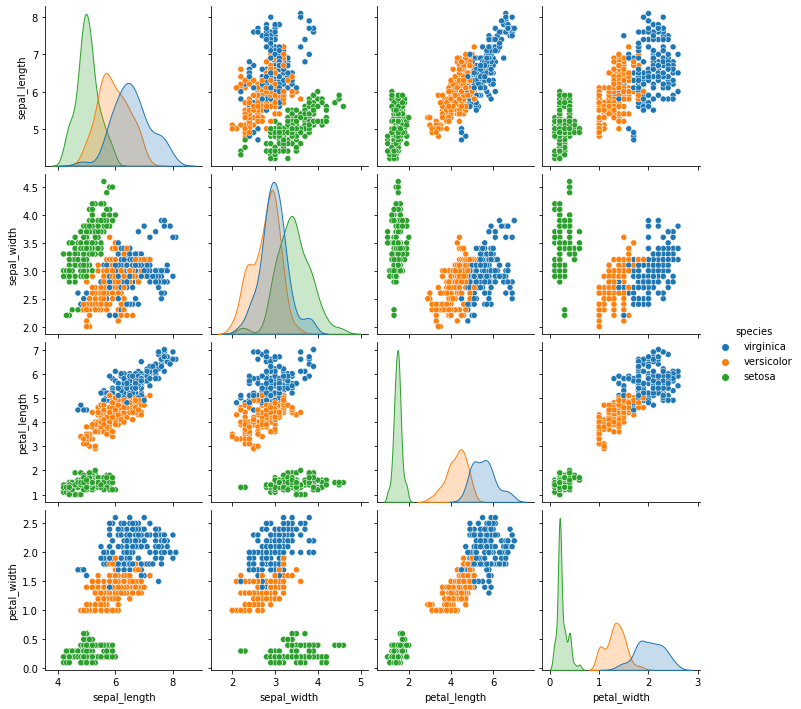

In [15]:
import seaborn as sns

g = sns.pairplot(iris, hue="species")
plt.show()

We extract the feature and label arrays from the DataFrame.

In [16]:
X = iris.iloc[:,:4].values
y = iris.iloc[:,4].values

We will now create training, validation, and test sets, using a 80/10/10 split.

In [17]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(480,)
(60,)
(60,)


In the cell below, we will perform hyperparameter tuning to select an appropriate value for `max_depth`. 

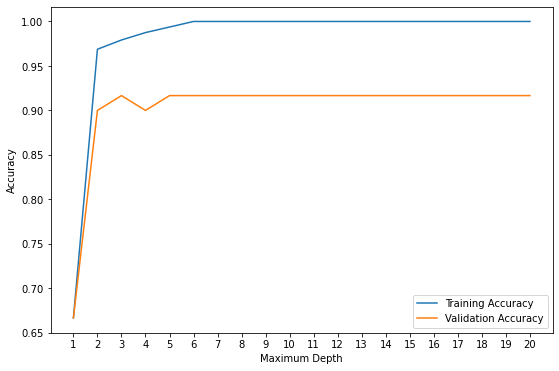

In [18]:
tr_acc = []
va_acc = []

depth_list = range(1,21)

for d in depth_list:
    temp_mod = DecisionTreeClassifier(max_depth=d, random_state=1)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_valid, y_valid))

plt.figure(figsize=([9, 6]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_list)
plt.legend()
plt.show()

It appears that we get the best performance on the validation set when `max_depth=3`. We confirm this below.

In [19]:
ix_best = np.argmax(va_acc)
best_md = depth_list[ix_best]
print('Optimal Value of max_depth:', best_md)

Optimal Value of max_depth: 3


We now train our model using the optimal value of `max_depth` we have found. We then display the model's accuracy on the training, validation, and test sets. 

In [20]:
iris_tree = DecisionTreeClassifier(max_depth = best_md, random_state=1)
iris_tree.fit(X_train, y_train)

print('Training Accuracy:  ', round(iris_tree.score(X_train, y_train),4))
print('Validation Accuracy:', round(iris_tree.score(X_valid, y_valid),4))
print('Test Set Accuracy:  ', round(iris_tree.score(X_test, y_test),4))

Training Accuracy:   0.9792
Validation Accuracy: 0.9167
Test Set Accuracy:   0.95


The diagram below displays the rules learned by our final decision tree. 

![Iris_Tree](images/iris_tree.png)

In the cell below, we display the confusion matrix for our test set. 

In [21]:
test_pred = iris_tree.predict(X_test)

cm = confusion_matrix(y_test, test_pred)

cm_df = pd.DataFrame(cm)
cm_df

,0,1,2
0,20,0,0
1,0,18,2
2,0,1,19


We finish this example by displaying the classification report for the test set. 

In [22]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      0.90      0.92        20
   virginica       0.90      0.95      0.93        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

